#### Testing mystic differential evolution

In [1]:
from mystic.solvers import DifferentialEvolutionSolver2
from mystic.models.poly import chebyshev8, chebyshev8cost
from mystic.models.poly import chebyshev8coeffs
from mystic.termination import VTR
from mystic.strategy import Best1Exp
from mystic.monitors import VerboseMonitor
from mystic.tools import getch, random_seed
from mystic.math import poly1d
import matplotlib.pyplot as plt
import numpy
plt.ion()

In [2]:
#helper functions 
# draw the exact plot
def plot_exact():
    plt.title("exact 8th-order Chebyshev polynomial")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    x = numpy.arange(-1.2, 1.2001, 0.01)
    exact = chebyshev8(x)
    plt.plot(x,exact,'b-')
    plt.legend(["Exact"])
    plt.axis([-1.4,1.4,-2,8])
    plt.draw()
    plt.pause(0.001)
    return
 
# plot the polynomial
def plot_solution(params,style='y-'):
    plt.title("estimated 8th-order Chebyshev polynomial")
    x = numpy.arange(-1.2, 1.2001, 0.01)
    f = poly1d(params)
    y = f(x)
    plt.plot(x,y,style)
    plt.legend(["Fitted"])
    plt.axis([-1.4,1.4,-2,8])
    plt.draw()
    plt.pause(0.001)
    return

# plot the polynomial and solution
def plot_compare(params,style='y-'):
    plt.title("comparing estimated and exact polynomial")
    x = numpy.arange(-1.2, 1.2001, 0.01)
    f = poly1d(params)
    y = f(x)
    plt.plot(x,y,style)
    exact = chebyshev8(x)
    plt.plot(x, exact)
    plt.legend(["Estimated", "Exact"])
    plt.axis([-1.4,1.4,-2,8])
    plt.draw()
    plt.pause(0.001)
    return

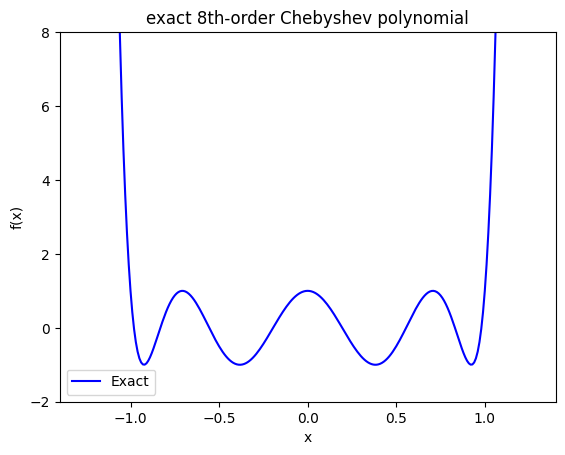

Generation 0 has ChiSquare: 76214.552492692
Generation 50 has ChiSquare: 505.9968491670626
Generation 100 has ChiSquare: 8.002314993205209
Generation 150 has ChiSquare: 0.5274804233772965
Generation 200 has ChiSquare: 0.0394552722636104
Generation 250 has ChiSquare: 0.013283065659525483
STOP("VTR with {'tolerance': 0.01, 'target': 0.0}")

Generation 266 has best Chi-Squared: 0.009536414811823456

Estimated poly:
        8         7         6         5         4         3         2
125.8 x - 1.345 x - 249.1 x + 3.474 x + 153.3 x - 2.789 x - 29.94 x + 0.6762 x + 0.9512


Actual Coefficients:
      8       6       4      2
128 x - 256 x + 160 x - 32 x + 1



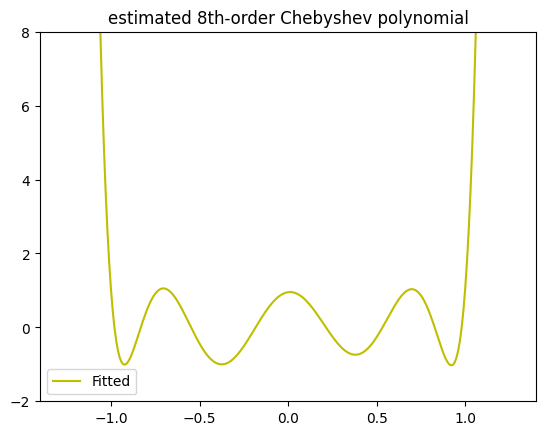

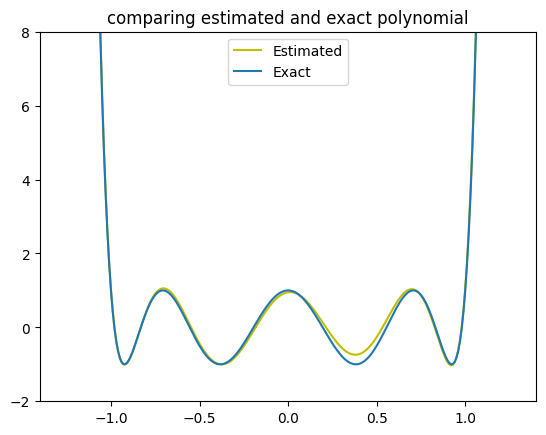

In [3]:
# plot exact poly
plot_exact()

#number dimensions, range for random initial guess
ndim = 9
x0 = [(-100,100)]*ndim
random_seed(123)

# configure monitor
stepmon = VerboseMonitor(50)

# use DE to solve 8th-order Chebyshev coefficients
npop = 10*ndim
solver = DifferentialEvolutionSolver2(ndim,npop)
solver.SetRandomInitialPoints(min=[-100]*ndim, max=[100]*ndim)
solver.SetGenerationMonitor(stepmon)
solver.enable_signal_handler()
solver.Solve(chebyshev8cost, termination=VTR(0.01), strategy=Best1Exp,
                CrossProbability=1.0, ScalingFactor=0.9,
                sigint_callback=plot_solution)
solution = solver.Solution()

# use monitor to retrieve results information
iterations = len(stepmon)
cost = stepmon.y[-1]
print("\nGeneration %d has best Chi-Squared: %s" % (iterations, cost))

#estimated polynomials
print("\nEstimated poly:\n %s\n" % poly1d(solution))

# compare solution with actual 8th-order Chebyshev coefficients
print("\nActual Coefficients:\n %s\n" % poly1d(chebyshev8coeffs))

# plot solution 
plot_solution(solution)

# plot solution versus exact coefficients
plot_compare(solution)
